In [1]:
import networkx as nx
import numpy as np
import random
import time
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#function to choose a random int value for k 
def choose_k():
    k = random.randint(1,100)
    return k

### Part 1 
#### Generate p-ER random graphs

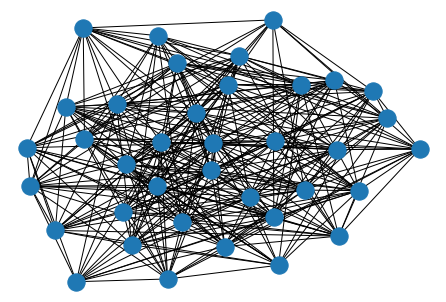

In [4]:
k = choose_k()
p = 0.5
G_ER = nx.erdos_renyi_graph(k,p)
nx.draw(G_ER)

#### Generate r-regular random graph

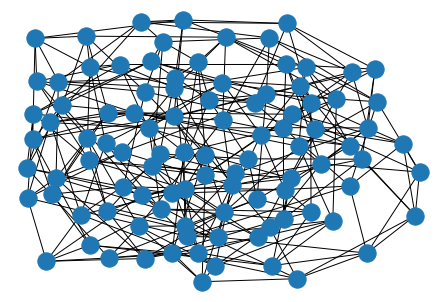

In [6]:
k=choose_k()
r=6
r_reg_G  = nx.random_regular_graph(r, k)
nx.draw(r_reg_G)

### Part 2
#### Write a script to check the connectivity of a given graph:
1. Algebraic method 1 (Irreducibility)

In [7]:
def Irreducibility(graph):
    A = nx.to_numpy_matrix(graph)
    n = A.shape[0]
    S = np.identity(n)
    for k in range(n):
        S += np.linalg.matrix_power(A,k)
    if S.all() > 0: 
        return(True)
    else:
        return(False)

In [8]:
#check for the ER graph
Irreducibility(G_ER)

True

In [9]:
#check for the r-regular graph
Irreducibility(r_reg_G)

True

2. Algebraic method 2 (eigenvalue of the Laplacian matrix)

In [10]:
def check_laplacian(graph):
    eigenvalue = nx.laplacian_spectrum(graph)
    if eigenvalue[1]>10e-7:
        return(True)
    else:
        return(False)

In [11]:
#check for the ER graph
check_laplacian(G_ER)

True

In [12]:
#check for the r-regular graph
check_laplacian(r_reg_G)

True

3. Breadth-first search algorithm

In [13]:
def check_bfs(graph):
    t = nx.bfs_tree(graph,0)
    node_list = t.nodes()
    k = graph.nodes()
    if len(node_list) < len(k):
        return(False)
    else:
        return(True)

In [14]:
#check for the ER graph
check_bfs(G_ER)

True

In [15]:
#check for the r-regular graph
check_bfs(r_reg_G)

True

### Part 3
#### Compare the complexity as a function of K of the methods above by plotting curves of a complexity measure vs K.

In [16]:
#define the current time in milliseconds
current_time_msec = lambda: int(round(time.time() * 1000))
#Function to compute the connectivity of the ER graph with different values of k and 50 simulations
def complexity(nodes,n_sim):
    time_bfs = 0
    time_irr = 0
    time_laplacian = 0
    G = nx.erdos_renyi_graph(nodes,0.5)
    bfs = np.array([])
    irr = np.array([])
    lapl = np.array([])
    for i in range(n_sim):
        #BFS
        start_bf = int(current_time_msec())#set starting time
        check_bfs(G) #use networkX function for BFS connectivity
        bfs = np.append(bfs,int(current_time_msec())-start_bf)
        
        #IRREDUCIBILITY
        start_irr = int(current_time_msec())#set starting time
        Irreducibility(G) 
        irr = np.append(irr,int(current_time_msec())-start_irr)
                
        #LAPLACIAN
        start_lapl = int(current_time_msec())#set starting time
        check_laplacian(G) 
        lapl = np.append(lapl,int(current_time_msec())-start_lapl)
    
    #compute the mean of the time and store into the lists
    time_bfs=np.mean(bfs)
    time_irr=np.mean(irr)
    time_laplacian=np.mean(lapl)      
    return(time_bfs,time_irr,time_laplacian)

In [18]:
#a set of nodes to use for checking the connectivity
nodes = [5, 10, 20, 40, 60, 80, 100]
b= []
i = []
l = []
#for each number of nodes, invoke the funtion over 50 simulations and store the results
for node in nodes:
    b.append(complexity(node,n_sim=50)[0])
    i.append(complexity(node,n_sim=50)[1])
    l.append(complexity(node,n_sim=50)[2])

In [19]:
# save the results into dataframe, usefull for the plot
BFS_time = pd.DataFrame(b,columns = (['Mean_time']))
Irr_time = pd.DataFrame(i,columns = (['Mean_time']))
Lapl_time = pd.DataFrame(l,columns = (['Mean_time']))

In [20]:
BFS_time

,Mean_time
0,0.02
1,0.00
2,0.00
3,0.20
4,0.56
5,0.52
6,1.02


In [21]:
Irr_time

,Mean_time
0,0.02
1,0.00
2,0.16
3,2.68
4,7.62
5,113.32
6,196.40


In [22]:
Lapl_time

,Mean_time
0,0.38
1,1.18
2,2.36
3,6.80
4,12.48
5,10.18
6,19.68


#### Complexity plot

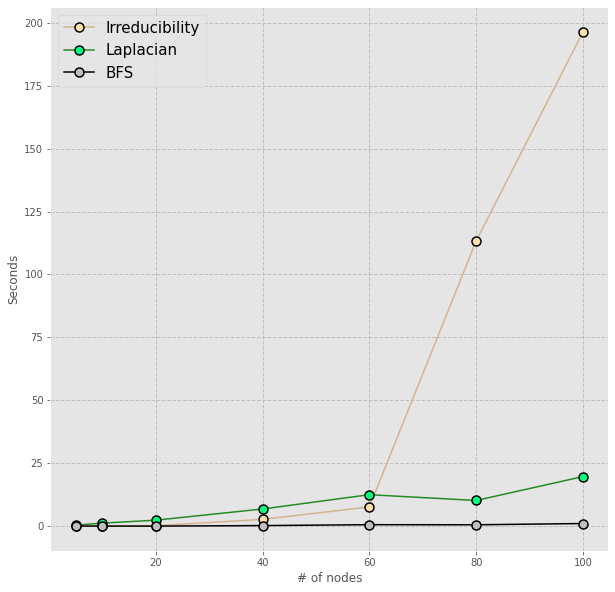

<Figure size 720x720 with 0 Axes>

In [23]:
plt.style.use('ggplot')
plt.rc('figure', figsize = (10, 10))

Y1 = list(BFS_time['Mean_time'])
Y2 = list(Irr_time['Mean_time'])
Y3 = list(Lapl_time['Mean_time'])

ax = plt.axes()
plt.grid(True, lw = 1, ls = '--', c = '.75')


plt.plot(nodes, Y2,
         linewidth = 1.5,
         color = 'tan',
         markersize = 9,
         markeredgewidth = 1.5,
         markerfacecolor = 'navajowhite',
         markeredgecolor = 'k',
         marker = 'o',
         label = 'Irreducibility')

plt.plot(nodes, Y3,
         linewidth = 1.5,
         color = 'forestgreen',
         markersize = 9,
         markeredgewidth = 1.5,
         markerfacecolor = 'springgreen',
         markeredgecolor = 'k',
         marker = 'o',
         label = 'Laplacian')

plt.plot(nodes, Y1,
         linewidth = 1.5,
         color = 'k',
         markersize = 9,
         markeredgewidth = 1.5,
         markerfacecolor = '.75',
         markeredgecolor = 'k',
         marker = 'o',
         label = 'BFS')


plt.legend(prop={'size': 15}, fancybox = True)
plt.xlabel('# of nodes')
plt.ylabel('Seconds')
plt.show();
plt.savefig('complexity.jpg')

### Part 3 
#### Let pc (G) denote the probability that a graph G is connected. By running Monte Carlo simulations estimates pc(G)
1. pc(G) vs. p for Erdos-Renyi graphs with K = 100.

In [24]:
def MC_Erdos():
    prob_range = np.arange(0,0.3,0.01)
    pc_erdos = []
    for prob in prob_range:
        p_hat = np.array([])
        for i in range(50): #number of simulations = 50
            G = nx.erdos_renyi_graph(k=100,prob)
            p_hat = np.append(p_hat,nx.is_connected(G))
        pc_erdos.append(np.mean(p_hat))
    return (prob_range, pc_erdos)

In [25]:
prob_range, pc_erdos = MC_Erdos()
print(pc_erdos)

[0.0, 0.0, 0.0, 0.0, 0.1, 0.52, 0.76, 0.92, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Plot for the Monte Carlo simulation for the Erdos-Renyi graph

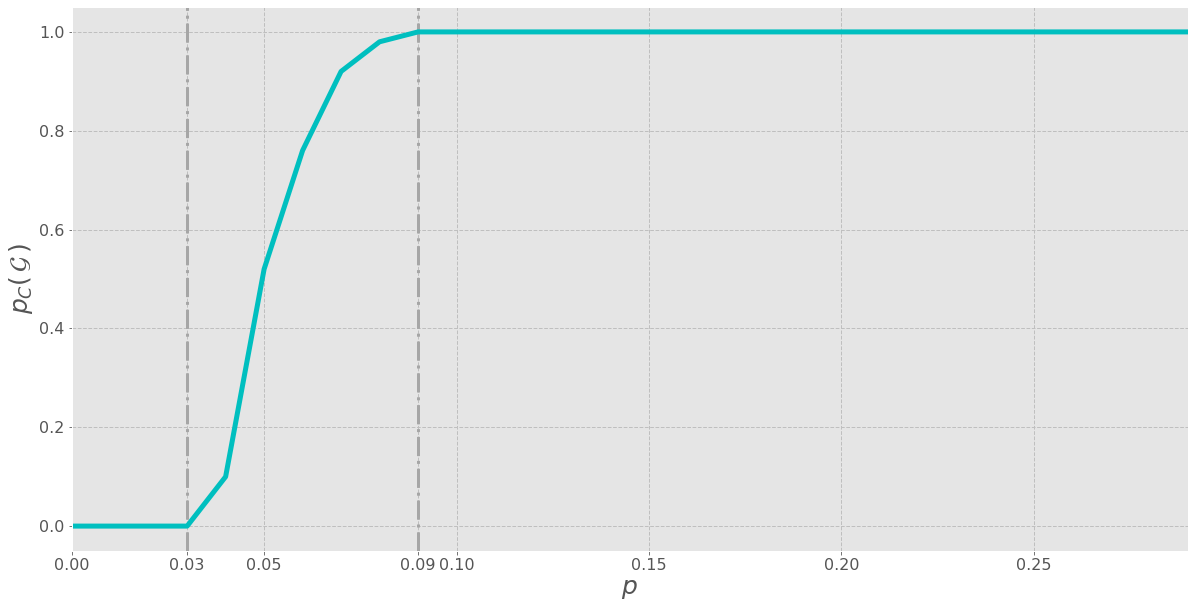

In [26]:
plt.rc('figure', figsize = (20, 10))
plt.axvline(x = 0.09, 
           c = '0.65',
           linestyle = 'dashdot',
           linewidth = 3)

plt.axvline(x = 0.03, 
           c = '0.65',
           linestyle = 'dashdot',
           linewidth = 3)

plt.plot(prob_range, pc_erdos, 
         linewidth = 5, 
         c = 'c')

plt.grid(True, lw = 1, ls = '--', c = '.75')

extraticks = [0.03,0.09]
plt.xticks(list(plt.xticks()[0]) + extraticks,fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0.00, 0.29])     

plt.xlabel('$p$',fontsize=25)
plt.ylabel(r'$p_C( \, \mathcal{G} \, )$',fontsize=25)
plt.savefig('prob_pEr.jpg')
plt.show()

2. pc(G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.

In [28]:
def MC_reg():
    r_list = [2,8] 
    nodes = [10, 20, 30, 40, 50, 60, 70 ,80]
    D = {2: [], 8: []}
    for neighbour in r_list:
        pc = []
        for k in nodes:
            phat = np.array([])
            for i in range(50): 
                G = nx.random_regular_graph(neighbour, k)
                phat = np.append(phat,nx.is_connected(G))
            pc.append(np.mean(phat))
        D[neighbour].append(pc)
    return (nodes, D)

Plot for the Monte Carlo simulation for the r-regular random graph

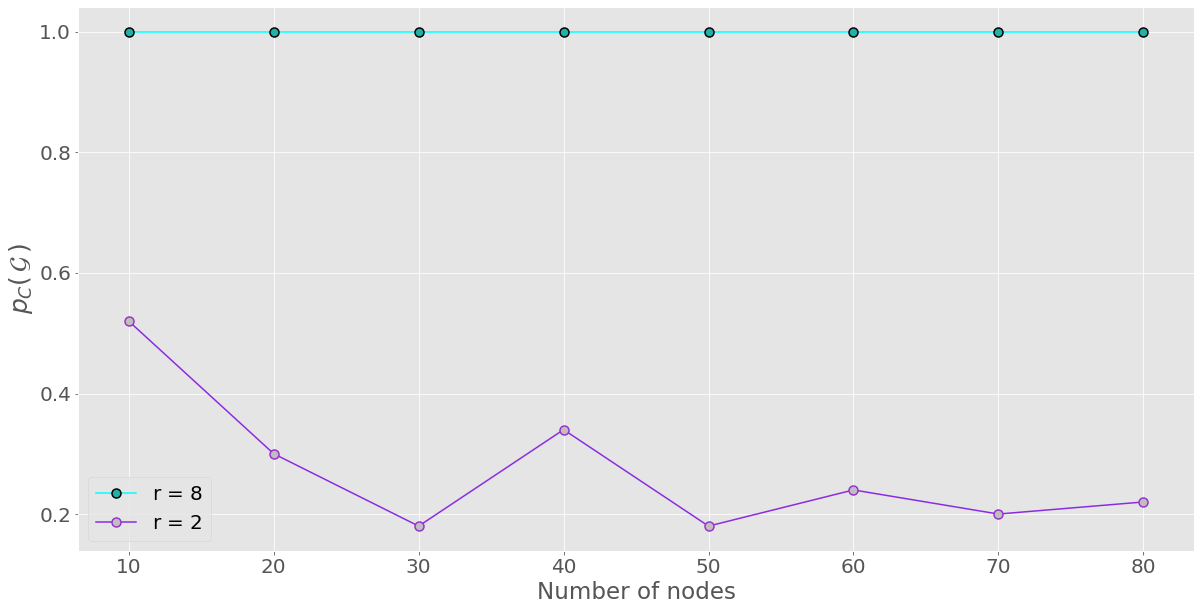

In [29]:
X, D = MC_reg()
Y1 = D[2][0]
Y2 = D[8][0]

plt.plot(X, Y2, 
         c = 'aqua',
         linewidth = 1.5,
         markersize = 9,
         markeredgewidth = 1.5,
         markerfacecolor = 'lightseagreen',
         markeredgecolor = 'k',
         marker = 'o',
         label = 'r = $8$')


plt.plot(X, Y1, 
         linewidth = 1.5,
         color = 'blueviolet',
         markersize = 9,
         markeredgewidth = 1.5,
         markerfacecolor = '.75',
         markeredgecolor = 'darkorchid',
         marker = 'o',
         label = 'r = $2$')

plt.legend(prop={'size': 20}, fancybox = True)
plt.xlabel('Number of nodes',fontsize=23)
plt.ylabel(r'$p_C( \, \mathcal{G} \, )$',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('prob_r_reg.jpg')
plt.show()